** Various MLP architectures on MNIST Data set**

In [0]:
#importing required libraires
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal
from keras.models import Sequential 
from keras.layers import Dense, Activation ,Dropout
%matplotlib inline

In [3]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
from keras.datasets import mnist
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

Using TensorFlow backend.


In [0]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [0]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])
X_train = X_train/255
X_test = X_test/255
output_dim = 10
input_dim = X_train.shape[1]




In [0]:
batch_size = 128
nb_epoch = 50

In [0]:

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

**Model1:** Layer1: 512  neurons with acivation as sigmoid
              +
              Layer2: 128  neurons with acivation as sigmoid
              +
               Layer3: 64  neurons with acivation as sigmoid
               +
               sofmax layer

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 6s 97us/step - loss: 2.3082 - acc: 0.1101 - val_loss: 2.2944 - val_acc: 0.1139
Epoch 2/50
60000/60000 [==============================] - 5s 91us/step - loss: 2.2919 - acc: 0.1252 - val_loss: 2.2887 - val_acc: 0.1909
Epoch 3/50
60000/60000 [==============================] - 5s 90us/step - loss: 2.2859 - acc: 0.1311 - val_loss: 2.2817 - val_acc: 0.1175
Epoch 4/50
60000/60000 [==============================] - 5s 92us/step - loss: 2.2789 - acc: 0.1414 - val_loss: 2.2742 - val_acc: 0.1816
Epoch 5/50
60000/60000 [==============================] - 5s 90us/step - loss: 2.2705 - acc: 0.1823 - val_loss: 2.2650 - val_acc: 0.2733
Epoch 6/50
60000/60000 [==============================] - 5s 91us/step - loss: 2.2600 - acc: 0.2404 - val_loss: 2.2530 - val_acc: 0.1944
Epoch 7/50
60000/60000 [==============================] - 5s 91us/step - loss: 2.2464 - acc: 0.2741 - val_loss: 2.2373 - val_acc

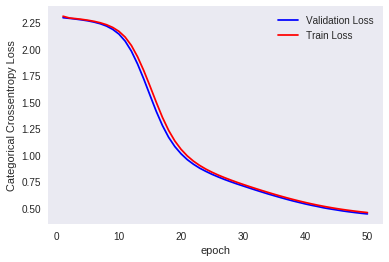

In [26]:
%matplotlib inline
model = Sequential()
model.add(Dense(512,activation='sigmoid',input_shape=(input_dim,)))
               
model.add(Dense(128,activation='sigmoid')) 
model.add(Dense(64,activation='sigmoid'))    

model.add(Dense(output_dim, activation='softmax'))
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)
               
               
                              
               
               
               
               


We are getting train accuracy of 87.23% after 50 epochs and test accuracy 87.46%.Lets try relu activation units

**Model2**: Layer1: 512 neurons with acivation as relu + Layer2: 128 neurons with acivation as relu + Layer3: 64 neurons with acivation as relu + sofmax layer

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 6s 99us/step - loss: 1.2023 - acc: 0.7060 - val_loss: 0.5115 - val_acc: 0.8722
Epoch 2/50
60000/60000 [==============================] - 5s 91us/step - loss: 0.4242 - acc: 0.8872 - val_loss: 0.3483 - val_acc: 0.9038
Epoch 3/50
60000/60000 [==============================] - 5s 90us/step - loss: 0.3313 - acc: 0.9072 - val_loss: 0.2985 - val_acc: 0.9190
Epoch 4/50
60000/60000 [==============================] - 5s 89us/step - loss: 0.2898 - acc: 0.9180 - val_loss: 0.2708 - val_acc: 0.9220
Epoch 5/50
60000/60000 [==============================] - 5s 87us/step - loss: 0.2628 - acc: 0.9254 - val_loss: 0.2447 - val_acc: 0.9291
Epoch 6/50
60000/60000 [==============================] - 5s 88us/step - loss: 0.2418 - acc: 0.9305 - val_loss: 0.2284 - val_acc: 0.9341
Epoch 7/50
60000/60000 [==============================] - 5s 88us/step - loss: 0.2242 - acc: 0.9360 - val_loss: 0.2147 - val_acc

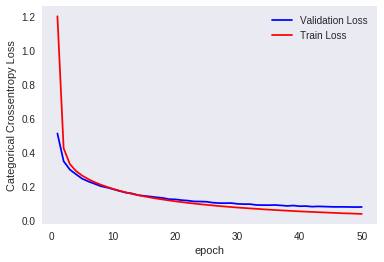

In [27]:
%matplotlib inline
model = Sequential()
model.add(Dense(512,activation='relu',input_shape=(input_dim,)))
               
model.add(Dense(128,activation='relu')) 
model.add(Dense(64,activation='relu'))    

model.add(Dense(output_dim, activation='softmax'))
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)
               
               

We are getting train accuracy of 99.07% after 50 epochs and test accuracy 97.62%.As there is some diffrence in test and rain accuracy .Lets try relu activation units + dropouts

**Model3**: Layer1: 512 neurons with acivation as relu + Dropout (0.25)+Layer2: 128 neurons with acivation as relu + Layer3: 64 neurons with acivation as relu+ Dropout (0.25) + sofmax layer

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 6s 104us/step - loss: 1.4936 - acc: 0.5363 - val_loss: 0.6266 - val_acc: 0.8494
Epoch 2/50
60000/60000 [==============================] - 6s 94us/step - loss: 0.6514 - acc: 0.8029 - val_loss: 0.3862 - val_acc: 0.8974
Epoch 3/50
60000/60000 [==============================] - 6s 95us/step - loss: 0.4874 - acc: 0.8552 - val_loss: 0.3137 - val_acc: 0.9127
Epoch 4/50
60000/60000 [==============================] - 6s 95us/step - loss: 0.4198 - acc: 0.8760 - val_loss: 0.2774 - val_acc: 0.9223
Epoch 5/50
60000/60000 [==============================] - 6s 96us/step - loss: 0.3699 - acc: 0.8928 - val_loss: 0.2482 - val_acc: 0.9283
Epoch 6/50
60000/60000 [==============================] - 6s 96us/step - loss: 0.3355 - acc: 0.9016 - val_loss: 0.2277 - val_acc: 0.9339
Epoch 7/50
60000/60000 [==============================] - 6s 96us/step - loss: 0.3052 - acc: 0.9114 - val_loss: 0.2092 - val_ac

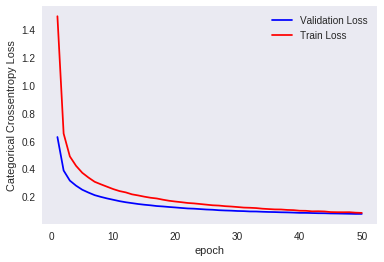

In [28]:
%matplotlib inline
model = Sequential()
model.add(Dense(512,activation='relu',input_shape=(input_dim,)))
model.add(Dropout(0.25))
model.add(Dense(128,activation='relu')) 
model.add(Dense(64,activation='relu'))    
model.add(Dropout(0.25))
model.add(Dense(output_dim, activation='softmax'))
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)
               

we can there is less difference in train and test accuracy using dropouts which is generally used to avoid over fitting.We are getting train accuracy of 99.07% after 50 epochs and test accuracy 97.62%. .Lets try relu activation units + dropouts+Batch Normalization

**Model4:** Layer1: 512 neurons with acivation as relu + Dropout (0.25)+Layer2: 128 neurons with acivation as relu+ Batch normalization + Layer3: 64 neurons with acivation as relu+ Dropout (0.25) + sofmax layer

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 7s 114us/step - loss: 0.7333 - acc: 0.7824 - val_loss: 0.3020 - val_acc: 0.9134
Epoch 2/50
60000/60000 [==============================] - 6s 101us/step - loss: 0.3293 - acc: 0.9043 - val_loss: 0.2166 - val_acc: 0.9354
Epoch 3/50
60000/60000 [==============================] - 6s 102us/step - loss: 0.2527 - acc: 0.9258 - val_loss: 0.1764 - val_acc: 0.9475
Epoch 4/50
60000/60000 [==============================] - 6s 101us/step - loss: 0.2123 - acc: 0.9380 - val_loss: 0.1527 - val_acc: 0.9530
Epoch 5/50
60000/60000 [==============================] - 6s 98us/step - loss: 0.1850 - acc: 0.9460 - val_loss: 0.1361 - val_acc: 0.9600
Epoch 6/50
60000/60000 [==============================] - 6s 98us/step - loss: 0.1639 - acc: 0.9513 - val_loss: 0.1234 - val_acc: 0.9619
Epoch 7/50
60000/60000 [==============================] - 6s 99us/step - loss: 0.1486 - acc: 0.9559 - val_loss: 0.1130 - val

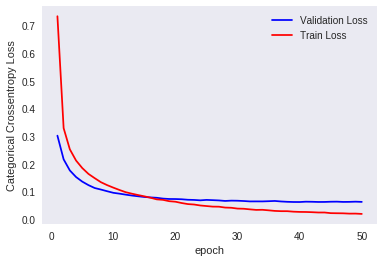

In [30]:
from keras.layers.normalization import BatchNormalization
%matplotlib inline
model = Sequential()
model.add(Dense(512,activation='relu',input_shape=(input_dim,)))
model.add(Dropout(0.25))

model.add(Dense(128,activation='relu')) 
model.add(BatchNormalization())
model.add(Dense(64,activation='relu'))    

model.add(Dense(output_dim, activation='softmax'))
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)
               

we are getting train accuracy 99.39 and test accuracy 98.17

**Model5: **Layer1: 512 neurons with acivation as relu + Dropout (0.25)+Layer2: 128 neurons with acivation as relu+ Dropout (0.5)+ Batch normalization + Layer3: 64 neurons with acivation as relu + sofmax layer

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 8s 126us/step - loss: 1.2475 - acc: 0.6113 - val_loss: 0.5233 - val_acc: 0.8738
Epoch 2/50
60000/60000 [==============================] - 6s 108us/step - loss: 0.5982 - acc: 0.8293 - val_loss: 0.3246 - val_acc: 0.9119
Epoch 3/50
60000/60000 [==============================] - 7s 109us/step - loss: 0.4517 - acc: 0.8688 - val_loss: 0.2532 - val_acc: 0.9283
Epoch 4/50
60000/60000 [==============================] - 6s 105us/step - loss: 0.3752 - acc: 0.8907 - val_loss: 0.2169 - val_acc: 0.9385
Epoch 5/50
60000/60000 [==============================] - 6s 105us/step - loss: 0.3288 - acc: 0.9049 - val_loss: 0.1931 - val_acc: 0.9445
Epoch 6/50
60000/60000 [==============================] - 6s 106us/step - loss: 0.2934 - acc: 0.9150 - val_loss: 0.1723 - val_acc: 0.9490
Epoch 7/50
60000/60000 [==============================] - 6s 104us/step - loss: 0.2655 - acc: 0.9244 - val_loss: 0.1591 - 

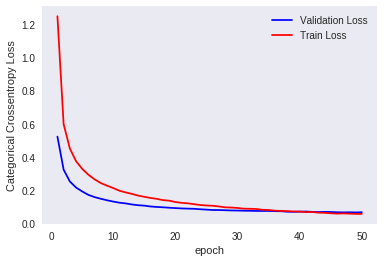

In [31]:
from keras.layers.normalization import BatchNormalization
%matplotlib inline
model = Sequential()
model.add(Dense(512,activation='relu',input_shape=(input_dim,)))
model.add(Dropout(0.25))

model.add(Dense(128,activation='relu')) 
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(64,activation='relu'))    

model.add(Dense(output_dim, activation='softmax'))
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)
               

we are getting 98.15 train accuracy and 98.01 test accuracy .Lets try the same model with tanh activation

**Model6: **Layer1: 512 neurons with acivation as tanh + Dropout (0.25)+Layer2: 128 neurons with acivation as tanh+ Dropout (0.5)+ Batch normalization + Layer3: 64 neurons with acivation as tanh + sofmax layer



Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 10s 159us/step - loss: 0.7072 - acc: 0.7971 - val_loss: 0.3784 - val_acc: 0.8977
Epoch 2/50
60000/60000 [==============================] - 8s 141us/step - loss: 0.4058 - acc: 0.8860 - val_loss: 0.3089 - val_acc: 0.9140
Epoch 3/50
60000/60000 [==============================] - 9s 147us/step - loss: 0.3485 - acc: 0.9011 - val_loss: 0.2780 - val_acc: 0.9221
Epoch 4/50
60000/60000 [==============================] - 9s 145us/step - loss: 0.3146 - acc: 0.9103 - val_loss: 0.2570 - val_acc: 0.9289
Epoch 5/50
60000/60000 [==============================] - 9s 146us/step - loss: 0.2938 - acc: 0.9161 - val_loss: 0.2421 - val_acc: 0.9313
Epoch 6/50
60000/60000 [==============================] - 9s 142us/step - loss: 0.2748 - acc: 0.9212 - val_loss: 0.2306 - val_acc: 0.9343
Epoch 7/50
60000/60000 [==============================] - 8s 141us/step - loss: 0.2611 - acc: 0.9259 - val_loss: 0.2197 -

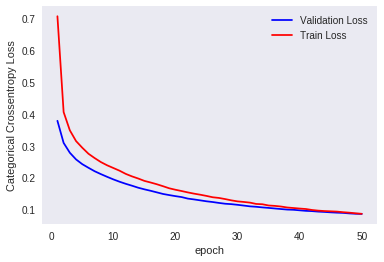

In [32]:
from keras.layers.normalization import BatchNormalization
%matplotlib inline
model = Sequential()
model.add(Dense(512,activation='tanh',input_shape=(input_dim,)))
model.add(Dropout(0.25))

model.add(Dense(128,activation='tanh')) 
model.add(BatchNormalization())
model.add(Dense(64,activation='tanh'))    

model.add(Dense(output_dim, activation='softmax'))
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)
               

we are getting 97.48 test accuracy and test accuracy 97.21.Lets try the same architecture with sigmoid

**Model7:** Layer1: 512 neurons with acivation as sigmoid + Dropout (0.25)+Layer2: 128 neurons with acivation as sigmoid+ Dropout (0.5)+ Batch normalization + Layer3: 64 neurons with acivation as sigmoid + sofmax layer



Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 10s 169us/step - loss: 2.1653 - acc: 0.2596 - val_loss: 1.8242 - val_acc: 0.6444
Epoch 2/50
60000/60000 [==============================] - 9s 152us/step - loss: 1.7265 - acc: 0.5192 - val_loss: 1.3079 - val_acc: 0.7212
Epoch 3/50
60000/60000 [==============================] - 9s 151us/step - loss: 1.3187 - acc: 0.6442 - val_loss: 0.9771 - val_acc: 0.7758
Epoch 4/50
60000/60000 [==============================] - 9s 150us/step - loss: 1.0535 - acc: 0.7142 - val_loss: 0.7846 - val_acc: 0.8162
Epoch 5/50
60000/60000 [==============================] - 9s 148us/step - loss: 0.8873 - acc: 0.7578 - val_loss: 0.6639 - val_acc: 0.8445
Epoch 6/50
60000/60000 [==============================] - 9s 148us/step - loss: 0.7772 - acc: 0.7828 - val_loss: 0.5813 - val_acc: 0.8606
Epoch 7/50
60000/60000 [==============================] - 9s 149us/step - loss: 0.7010 - acc: 0.8016 - val_loss: 0.5264 -

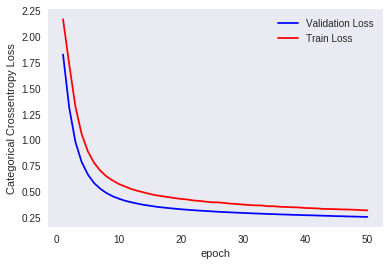

In [33]:
from keras.layers.normalization import BatchNormalization
%matplotlib inline
model = Sequential()
model.add(Dense(512,activation='sigmoid',input_shape=(input_dim,)))
model.add(Dropout(0.25))

model.add(Dense(128,activation='sigmoid')) 
model.add(BatchNormalization())
model.add(Dense(64,activation='sigmoid'))    

model.add(Dense(output_dim, activation='softmax'))
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)
               

we are getting 90.41 train accuracy and test accuracy 92.57.Lets try the same architecture with relu and adam optimizer

**Model 8:** Adam optimizer

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 12s 194us/step - loss: 0.2650 - acc: 0.9207 - val_loss: 0.1115 - val_acc: 0.9650
Epoch 2/50
60000/60000 [==============================] - 10s 174us/step - loss: 0.1078 - acc: 0.9675 - val_loss: 0.0833 - val_acc: 0.9748
Epoch 3/50
60000/60000 [==============================] - 10s 175us/step - loss: 0.0759 - acc: 0.9768 - val_loss: 0.0866 - val_acc: 0.9731
Epoch 4/50
60000/60000 [==============================] - 11s 176us/step - loss: 0.0592 - acc: 0.9805 - val_loss: 0.0695 - val_acc: 0.9769
Epoch 5/50
60000/60000 [==============================] - 11s 177us/step - loss: 0.0490 - acc: 0.9838 - val_loss: 0.0674 - val_acc: 0.9787
Epoch 6/50
60000/60000 [==============================] - 10s 174us/step - loss: 0.0393 - acc: 0.9874 - val_loss: 0.0633 - val_acc: 0.9788
Epoch 7/50
60000/60000 [==============================] - 10s 174us/step - loss: 0.0364 - acc: 0.9881 - val_loss: 0.

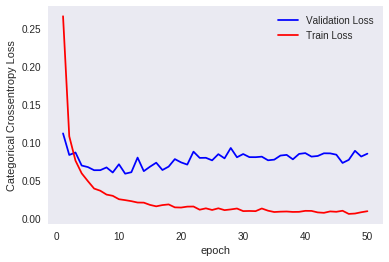

In [35]:
from keras.layers.normalization import BatchNormalization
%matplotlib inline
model = Sequential()
model.add(Dense(512,activation='relu',input_shape=(input_dim,)))
model.add(Dropout(0.25))

model.add(Dense(128,activation='relu')) 
  

model.add(Dense(output_dim, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)
               

we are getting 99.70 test accuracy and test accuracy 98.55.Lets try the some different architecture with relu and adam optimizer

**Model 9:**

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 12s 198us/step - loss: 0.3647 - acc: 0.8910 - val_loss: 0.1301 - val_acc: 0.9611
Epoch 2/50
60000/60000 [==============================] - 11s 180us/step - loss: 0.1537 - acc: 0.9557 - val_loss: 0.0935 - val_acc: 0.9704
Epoch 3/50
60000/60000 [==============================] - 11s 182us/step - loss: 0.1125 - acc: 0.9666 - val_loss: 0.0863 - val_acc: 0.9741
Epoch 4/50
60000/60000 [==============================] - 11s 182us/step - loss: 0.0904 - acc: 0.9730 - val_loss: 0.0704 - val_acc: 0.9780
Epoch 5/50
60000/60000 [==============================] - 11s 180us/step - loss: 0.0768 - acc: 0.9763 - val_loss: 0.0707 - val_acc: 0.9796
Epoch 6/50
60000/60000 [==============================] - 11s 177us/step - loss: 0.0657 - acc: 0.9801 - val_loss: 0.0661 - val_acc: 0.9818
Epoch 7/50
60000/60000 [==============================] - 11s 177us/step - loss: 0.0565 - acc: 0.9820 - val_loss: 0.

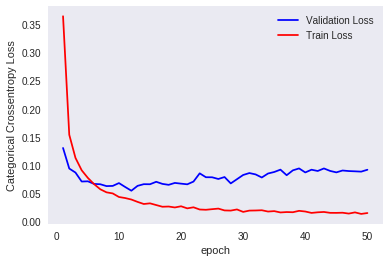

In [36]:
from keras.layers.normalization import BatchNormalization
%matplotlib inline
model = Sequential()
model.add(Dense(512,activation='relu',input_shape=(input_dim,)))
model.add(Dropout(0.25))

model.add(Dense(128,activation='relu')) 
  
model.add(Dropout(0.5))
model.add(Dense(output_dim, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

we are getting 99.55 test accuracy and test accuracy 98.39

Performance table:

In [37]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names= ['Model','Train_accuracy','Test_accuracy']
x.add_row(['Model1','87.17','87.52'])
x.add_row(['Model2','99.01','97.62'])
x.add_row(['Model3','97.08','97.05'])
x.add_row(['Model4','99.39','98.17'])
x.add_row(['Model5','98.15','98.01'])
x.add_row(['Model6','97.48','97.21'])
x.add_row(['Model7','90.77','92.47'])
x.add_row(['Model8','99.70','98.55'])
x.add_row(['Model9','99.55','98.39'])
print(x)

+--------+----------------+---------------+
| Model  | Train_accuracy | Test_accuracy |
+--------+----------------+---------------+
| Model1 |     87.17      |     87.52     |
| Model2 |     99.01      |     97.62     |
| Model3 |     97.08      |     97.05     |
| Model4 |     99.39      |     98.17     |
| Model5 |     98.15      |     98.01     |
| Model6 |     97.48      |     97.21     |
| Model7 |     90.77      |     92.47     |
| Model8 |     99.70      |     98.55     |
| Model9 |     99.55      |     98.39     |
+--------+----------------+---------------+


Conclusion : seeing above table we can say model8 is the bestmodel